In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('C:\\Users\\zzuge\\trn_micro.csv')
val = pd.read_csv('C:\\Users\\zzuge\\vld_micro.csv')

In [7]:
x_train=train.drop(['product_id','is_applied'],axis=1)
y_train=train['is_applied']

x_val=val.drop(['product_id','is_applied'],axis=1)
y_val=val['is_applied']

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664265 entries, 0 to 2664264
Data columns (total 28 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   credit_score                         int64  
 1   application_n                        int64  
 2   loyalty                              int64  
 3   gender                               int64  
 4   log_yearly_income                    float64
 5   log_career                           float64
 6   log_desired_amount                   float64
 7   log_existing_loan_cnt                float64
 8   log_existing_loan_amt                float64
 9   log_OpenApp                          float64
 10  log_UseDSRCalc                       float64
 11  nl_loan_limit                        float64
 12  nl_loan_rate                         float64
 13  nl_age                               float64
 14  is_goodbank                          int64  
 15  is_goodprod                     

In [10]:
import statsmodels.api as sm

In [11]:
glm = sm.Logit.from_formula("is_applied ~ credit_score+application_n+loyalty+C(gender)+log_yearly_income+log_career+log_desired_amount+log_existing_loan_cnt+log_existing_loan_amt+log_OpenApp+log_UseDSRCalc+nl_loan_limit+nl_loan_rate+nl_age+C(is_goodbank)+C(is_goodprod)+C(is_monday)+C(is_weekend)+C(is_after_16)+C(is_earned_income1)+C(is_earned_income2)+C(is_job_regular)+C(is_job_etc)+C(is_house_own)+C(is_house_lent)+C(is_purpose_living)+C(personal_rehabilitation_yn)+C(personal_rehabilitation_complete_yn)",train).fit()


print(glm.summary())

Optimization terminated successfully.
         Current function value: 0.298789
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             is_applied   No. Observations:              2664265
Model:                          Logit   Df Residuals:                  2664236
Method:                           MLE   Df Model:                           28
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:                  0.1956
Time:                        11:19:56   Log-Likelihood:            -7.9605e+05
converged:                       True   LL-Null:                   -9.8957e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

In [12]:
np.exp(glm.params)

Intercept                                      1.957972
C(gender)[T.1]                                 1.020233
C(is_goodbank)[T.1]                            8.643733
C(is_goodprod)[T.1]                            0.773823
C(is_monday)[T.1]                              1.022471
C(is_weekend)[T.1]                             0.926499
C(is_after_16)[T.1]                            0.904997
C(is_earned_income1)[T.1]                      0.965788
C(is_earned_income2)[T.1]                      0.937237
C(is_job_regular)[T.1]                         1.063153
C(is_job_etc)[T.1]                             1.091229
C(is_house_own)[T.1]                           1.003906
C(is_house_lent)[T.1]                          0.992163
C(is_purpose_living)[T.1]                      1.105874
C(personal_rehabilitation_yn)[T.1]             1.047168
C(personal_rehabilitation_complete_yn)[T.1]    1.218234
credit_score                                   0.998811
application_n                                  0

In [13]:
y_pred=glm.predict(x_val)

In [14]:
y_pred

0         0.097765
1         0.076614
2         0.085738
3         0.073104
4         0.128667
            ...   
667227    0.225992
667228    0.222698
667229    0.181329
667230    0.169022
667231    0.172432
Length: 667232, dtype: float64

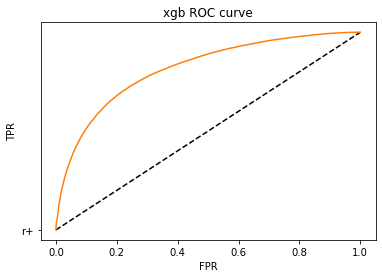

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='xgb')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('xgb ROC curve')
plt.show()

In [16]:
roc=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})
optimal_idx=np.argmax(tpr-fpr)
optimal_thresholds=thresholds[optimal_idx]

In [17]:
optimal_thresholds

0.16102135657732258

In [18]:
y_pred = [1 if x>0.16102135657732258 else 0 for x in y_pred]

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [20]:
f1_score(y_val, y_pred)

0.418267866265539

In [21]:
precision_score(y_val, y_pred)

0.29405543999321593

In [22]:
recall_score(y_val, y_pred)

0.724162500153557

In [23]:
accuracy_score(y_val, y_pred)

0.754247398206321